# arXiv data subset eda

In [1]:
import os
import sys
parent_dr = os.path.split(os.getcwd())[0]
if parent_dr not in sys.path:
    sys.path.append(parent_dr)

In [2]:
import pandas as pd
from core.util.basic_io import *
from core.util.plot_util import *
from core.data.arxiv_data_io import *

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
file_name = "arxiv_subset_15540.json"
full_path = os.path.join(parent_dr, "core", "resources", file_name)
data = read_json_to_dict(full_path)

In [5]:
data_df = create_arxiv_df(data)

In [6]:
data_df.head()

,id,authors,title,categories,abstract,update_dt
0,0704.0648,Kaushik Majumdar,Behavioral response to strong aversive stimuli: A neurodynamical model,q-bio.NC,"In this paper a theoretical model of functioning of a neural circuit during a\nbehavioral response has been proposed. A neural circuit can be thought of as a\ndirected multigraph whose each vertex is a neuron and each edge is a synapse.\nIt has been assumed in this paper that the behavior of such circuits is\nmanifested through the collective behavior of neurons belonging to that\ncircuit. Behavioral information of each neuron is contained in the coefficients\nof the fast Fourier transform (FFT) over the output spike train. Those\ncoefficients form a vector in a multidimensional vector space. Behavioral\ndynamics of a neuronal network in response to strong aversive stimuli has been\nstudied in a vector space in which a suitable pseudometric has been defined.\nThe neurodynamical model of network behavior has been formulated in terms of\nexisting memory, synaptic plasticity and feelings. The model has an analogy in\nclassical electrostatics, by which the notion of force and potential energy has\nbeen introduced. Since the model takes input from each neuron in a network and\nproduces a behavior as the output, it would be extremely difficult or may even\nbe impossible to implement. But with the help of the model a possible\nexplanation for an hitherto unexplained neurological observation in human brain\nhas been offered. The model is compatible with a recent model of sequential\nbehavioral dynamics. The model is based on electrophysiology, but its relevance\nto hemodynamics has been outlined.\n",2007-05-23
1,0704.1394,"Tarik Hadzic, Rune Moller Jensen, Henrik Reif Andersen",Calculating Valid Domains for BDD-Based Interactive Configuration,cs.AI,In these notes we formally describe the functionality of Calculating Valid\nDomains from the BDD representing the solution space of valid configurations.\nThe formalization is largely based on the CLab configuration framework.\n,2007-05-23
2,0704.1829,"Stefan Felsner, Kamil Kloch, Grzegorz Matecki, and Piotr Micek",On-line Chain Partitions of Up-growing Semi-orders,cs.DM,"On-line chain partition is a two-player game between Spoiler and Algorithm.\nSpoiler presents a partially ordered set, point by point. Algorithm assigns\nincoming points (immediately and irrevocably) to the chains which constitute a\nchain partition of the order. The value of the game for orders of width $w$ is\na minimum number $\fVal(w)$ such that Algorithm has a strategy using at most\n$\fVal(w)$ chains on orders of width at most $w$. We analyze the chain\npartition game for up-growing semi-orders. Surprisingly, the golden ratio comes\ninto play and the value of the game is $\lfloor\frac{1+\sqrt{5}}{2}\; w\n\rfloor$.\n",2011-02-22
3,0704.2010,"Juliana S Bernardes, Alberto Davila, Vitor Santos Costa, Gerson\n Zaverucha",A study of structural properties on profiles HMMs,cs.AI,"Motivation: Profile hidden Markov Models (pHMMs) are a popular and very\nuseful tool in the detection of the remote homologue protein families.\nUnfortunately, their performance is not always satisfactory when proteins are\nin the 'twilight zone'. We present HMMER-STRUCT, a model construction algorithm\nand tool that tries to improve pHMM performance by using structural information\nwhile training pHMMs. As a first step, HMMER-STRUCT constructs a set of pHMMs.\nEach pHMM is constructed by weighting each residue in an aligned protein\naccording to a specific structural property of the residue. Properties used\nwere primary, secondary and tertiary structures, accessibility and packing.\nHMMER-STRUCT then prioritizes the results by voting. Results: We used the SCOP\ndatabase to perform our experiments. Throughout, we apply leave-one-family-out\ncross-validation over protein superfamilies. First, we used the MAMMOTH-mult\nstructural aligner to align the training set proteins. Then, we performed two

In [7]:
cat_descriptions = []
for cat_str in data_df['categories'].unique():
    cat_list = cat_str.split(" ")
    for cat in cat_list:
        brief_desc = CATEGORY_DICT[cat] if cat in CATEGORY_DICT else "NONE FOUND"
        long_desc = CATEGORY_DESCR[cat] if cat in CATEGORY_DESCR else "NONE FOUND"
        cat_descriptions.append([cat, brief_desc, long_desc])

In [8]:
category_df = pd.DataFrame(cat_descriptions, columns=['Code', 'Category', 'Descr'])
category_df.sort_values(by=['Code'], inplace=True)
category_df

,Code,Category,Descr
1,cs.AI,Artificial Intelligence,"Covers all areas of AI except Vision, Robotics, Machine Learning,Multiagent Systems, and Computation and Language (Natural Language Processing), which have separate subject areas. In particular, includes Expert Systems, Theorem Proving (although this may overlap with Logic in Computer Science), Knowledge Representation, Planning, and Uncertainty in AI."
3,cs.CY,Computers and Society,"Covers impact of computers on society, computer ethics, information technology and public policy, legal aspects of computing, computers and education."
2,cs.DM,Discrete Mathematics,"Covers combinatorics, graph theory, applications of probability."
5,econ.TH,Theoretical Economics,"Includes theoretical contributions to Contract Theory, Decision Theory, Game Theory, General Equilibrium, Growth, Learning and Evolution, Macroeconomics, Market and Mechanism Design, and Social Choice."
6,eess.AS,Audio and Speech Processing,"Theory and methods for processing signals representing audio, speech, and language, and their applications. This includes analysis, synthesis, enhancement, transformation, classification and interpretation of such signals as well as the design, development, and evaluation of associated signal processing systems. Machine learning and pattern analysis applied to any of the above areas is also welcome."
0,q-bio.NC,Neurons and Cognition,"Synapse, cortex, neuronal dynamics, neural network, sensorimotor control, behavior, attention"
4,q-bio.TO,Tissues and Organs,"Blood flow in vessels, biomechanics of bones, electrical waves, endocrine system, tumor growth"


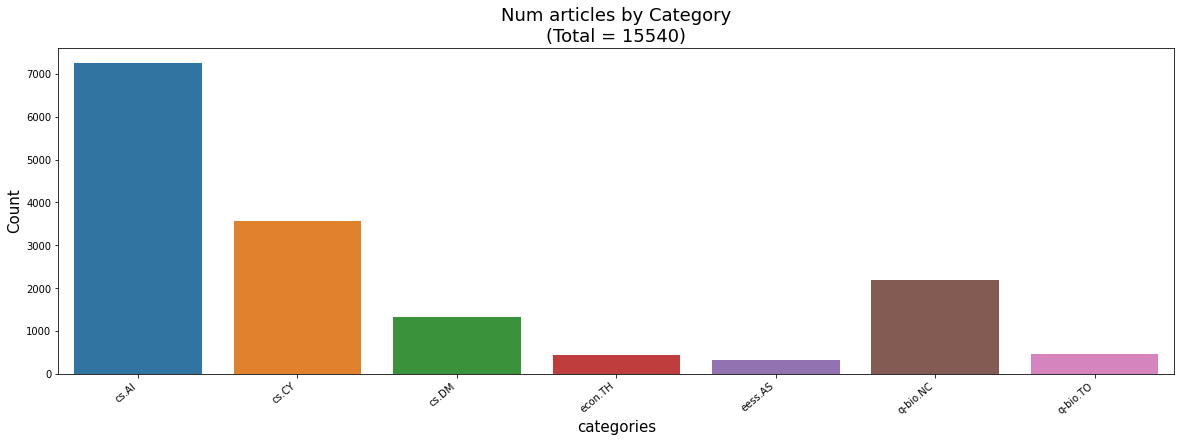

In [11]:
cat_counts = create_count_data(data_df, "categories")
create_barplot(cat_counts, "categories", "count", f"Num articles by Category\n(Total = {len(data_df)})")